<a href="https://colab.research.google.com/github/noorsahar001/Python-Assignments-04/blob/main/Assignment_01_(Part_03_basics_intermediate_projects).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Online Class Project 3**

#QR code encoder / decoder Python Project

In [2]:
!pip install qrcode[pil]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 2.3 MB/s eta 0:00:00


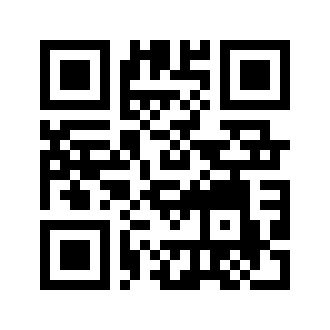

In [ ]:
import os
import qrcode
from PIL import Image
from IPython.display import display

data = "Don't forget to subscribe"
img = qrcode.make(data)

# Create the folder if it doesn't exist
output_dir = "C:/Users/HP/OneDrive/Documents/Maryam/new"
os.makedirs(output_dir, exist_ok=True)

# Save the QR code image
file_path = os.path.join(output_dir, "myqrcode.png")
img.save(file_path)

# Display the QR code image in the notebook
display(img)

#**Online Class Project 4:**

#Tic-Tac-Toe Python Project

In [ ]:
%%writefile player.py

import math
import random

class Player:
  def __init__(self,letter):
    self.letter = letter

  def get_move(self,game):
    pass


class RandomComputerPlayer(Player):
  def __init__(self, letter):
    super().__init__(letter)

  def get_move(self, game):
    square = random.choice(game.available_moves())
    return square

class HumanPlayer(Player):
  def __init__(self, letter):
    super().__init__(letter)

  def get_move(self, game):
    valid_square = False
    val = None
    while not valid_square:
      square = input(self.letter + '\'s turn. Input move (0-9): ')

      try:
        val = int(square)
        if val not in game.available_moves():
          raise ValueError
        valid_square = True
      except ValueError:
        print('Invalid square. Try again.')
    return val

Overwriting player.py


In [ ]:
%%writefile game.py

from player import HumanPlayer, RandomComputerPlayer


class TicTacToe:
  def __init__(self):
    self.board = [' ' for _ in range(9)]
    self.current_winner = None

  def print_board(self):
    for row in [self.board[i*3: (i+1)*3] for i in range(3)]:
      print('| ' + ' | '.join(row) + ' |')

  @staticmethod
  def print_board_nums():
    number_board = [[str(i) for i in range(j*3, (j+1)*3)] for j in range(3)]
    for row in number_board:
      print('| ' + ' | '.join(row) + ' |')

  def available_moves(self):
    return [i for i, spot in enumerate(self.board) if spot == ' ']

  def empty_squares(self):
    return ' ' in self.board

  def num_empty_squares(self):
    return self.board.count(' ')

  def make_move(self, square, letter):
    if self.board[square] == ' ':
      self.board[square] = letter
      if self.winner(square, letter):
        self.current_winner = letter
      return True
    return False


  def winner(self, square, letter):
    row_ind = square // 3
    row = self.board[row_ind*3 : (row_ind + 1) * 3]
    if all([spot == letter for spot in row]):
      return True


    col_ind = square % 3
    column = [self.board[col_ind+i*3] for i in range(3)]
    if all([spot == letter for spot in column]):
      return True

    if square % 2 == 0:
      diagonal1 = [self.board[i] for i in [0, 4, 8]]
      if all([spot == letter for spot in diagonal1]):
        return True
      diagonal2 = [self.board[i] for i in [2, 4, 6]]
      if all([spot == letter for spot in diagonal2]):
        return True

    return False



def play(game, x_player, o_player, print_game=True):
  if print_game:
    game.print_board_nums()

  letter = 'X'
  while game.empty_squares():
    if letter == 'O':
      square = o_player.get_move(game)
    else:
      square = x_player.get_move(game)

    if game.make_move(square, letter):
      if print_game:
        print(letter + f' makes a move to square {square}')
        game.print_board()
        print('')

      if game.current_winner:
        if print_game:
          print(letter + ' wins!')
        return letter

      letter = 'O' if letter == 'X' else 'X'

    if print_game:
      print('It\'s a tie!')

if __name__ == '__main__':
  x_player = HumanPlayer('X')
  o_player = RandomComputerPlayer('O')
  t = TicTacToe()
  play(t, x_player, o_player, print_game=True)

Overwriting game.py


In [ ]:
!pip install pygame --quiet

In [ ]:
!python game.py


| 0 | 1 | 2 |
| 3 | 4 | 5 |
| 6 | 7 | 8 |
X's turn. Input move (0-9): 2
X makes a move to square 2
|   |   | X |
|   |   |   |
|   |   |   |

It's a tie!
O makes a move to square 0
| O |   | X |
|   |   |   |
|   |   |   |

It's a tie!
X's turn. Input move (0-9): 4
X makes a move to square 4
| O |   | X |
|   | X |   |
|   |   |   |

It's a tie!
O makes a move to square 6
| O |   | X |
|   | X |   |
| O |   |   |

It's a tie!
X's turn. Input move (0-9): 8
X makes a move to square 8
| O |   | X |
|   | X |   |
| O |   | X |

It's a tie!
O makes a move to square 7
| O |   | X |
|   | X |   |
| O | O | X |

It's a tie!
X's turn. Input move (0-9): 5
X makes a move to square 5
| O |   | X |
|   | X | X |
| O | O | X |

X wins!


#**Online Class Project 5:**

#Binary Search Python Project

In [ ]:
%%writefile binary_search.py

import random
import time

def naive_search(l, target):
  for i in range(len(l)):
    if l[i] == target:
      return i
  return -1

def binary_search(l, target, low=None, high=None):
  if low is None:
    low = 0
  if high is None:
    high = len(l) - 1

  if high < low:
    return -1


  midpoint = (low + high) // 2



  if l[midpoint] == target:
    return midpoint
  elif target < l[midpoint]:
    return binary_search(l, target, low, midpoint-1)
  else:
    return binary_search(l, target, midpoint+1, high)

if __name__ == '__main__':
  # l = [1, 3, 5, 10, 12]
  # target = 10
  # print(naive_search(l, target))
  # print(binary_search(l, target))

  length = 10000
  sorted_list = set()
  while len(sorted_list) < length:
    sorted_list.add(random.randint(-3*length, 3*length))
  sorted_list = sorted(list(sorted_list))

  start = time.time()
  for target in sorted_list:
    naive_search(sorted_list, target)
  end = time.time()
  print("Naive search time: ", (end - start)/length, "seconds")

  start = time.time()
  for target in sorted_list:
    binary_search(sorted_list, target)
  end = time.time()
  print("Binary search time: ", (end - start)/length, "seconds")

Overwriting binary_search.py


In [ ]:
!python binary_search.py

Naive search time:  0.00032903423309326173 seconds
Binary search time:  2.3758649826049804e-06 seconds


#**Online Class Project 6:**

#Bulk File Re-namer Python Project

In [7]:
%%writefile rename.py

import os


def main():
  i = 0
  path = "C:/Users/HP/OneDrive/Documents/Noor Sahar/new/"
  for filename in os.listdir(path):
    my_dest = "image" + str(i) + ".jpg"
    my_source = path + filename
    my_dest =path + my_dest
    os.rename(my_source, my_dest)
    i += 1

if __name__ == '__main__':
  main()

Overwriting rename.py


In [ ]:
!python rename.py

# **Online Class Project 7:**

#Weather Program Python Project


In [ ]:
import requests
from pprint import pprint

API_Key = 'cb771e45ac79a4e8e2205c0ce66ff633'

city = input("Enter a city: ")

base_url = "http://api.openweathermap.org/data/2.5/weather?appid="+API_Key+"&q="+city

weather_data = requests.get(base_url).json()

pprint(weather_data)


Enter a city: Karachi
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 24.9056, 'lon': 67.0822},
 'dt': 1744668419,
 'id': 1174872,
 'main': {'feels_like': 302.5,
          'grnd_level': 1003,
          'humidity': 78,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 300.05,
          'temp_max': 300.05,
          'temp_min': 300.05},
 'name': 'Karachi',
 'sys': {'country': 'PK',
         'id': 7576,
         'sunrise': 1744679367,
         'sunset': 1744725214,
         'type': 1},
 'timezone': 18000,
 'visibility': 6000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 270, 'speed': 4.63}}


# **Online Class Project 8:**

#Streamlit Crash Course: Build Data-Driven Python Web Apps in Minutes! (Beginner Friendly Tutorial)

In [1]:
%%writefile streamlit.txt

Key Points

- No need for front-end coding
- Reactive -- your app updates every time a change is made
- Easy integration with Python libraries like Pandas, NumPy, and Matplotlib

30-40

Overwriting streamlit.txt


In [2]:
!pip install streamlit --quiet

In [3]:
!streamlit hello




  Welcome to Streamlit. Check out our demo in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.169.229.1:8501

  Ready to create your own Python apps super quickly?
  Head over to https://docs.streamlit.io

  May you create awesome apps!


  Stopping...
  Stopping...


In [4]:
!pip install streamlit pyngrok --quiet

In [6]:
from pyngrok import ngrok

ngrok.set_auth_token("2vorvmGx9dD5xJllkb2u5g58S7v_2LUR8wUKNJDbZxjRc46m3")

In [7]:
%%writefile apps.py

import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# st.title("Streamlit Fundamentals")

# st.header("This is Header")

# st.subheader("This is subheader")

# st.text("This is a simple text output")

# st.markdown("**This is bold text using markdown**")

# name = "Noor Sahar"

# number = 10

# st.write("Hello ", name)
# st.write("Here's a random number: ", number)

# if st.button("Click me"):
#   st.write("Button clicked!")

# checked = st.checkbox("Check me!")

# if checked:
#   st.write("Checkbox is checked!")

# age = st.slider("Select your age", 0, 100, 25)

# st.write("Your age is: ", age)

# name = st.text_input("Enter your name")
# age = st.slider("Select your age", 0, 100)

# if st.button("Submit"):
#   st.write(f"Hello {name}, you are {age} years old.")

st.title("User Info Form")

name = st.text_input("Enter your name")
age = st.slider("Select your age", 0, 100)
favourite_number = st.text_input("Enter your favourite number")

if st.button("Submit!"):
  st.write(f"Hello, {name}! You are {age} years old, your favourite number is {favourite_number}.")

st.write("-------------------------------")


#age = st.number_input("Enter your age", value=20)

#st.write("Entered age: ", age)



# data = {"Name": ["Noor Sahar", "Shafiq", "Rasheeda", "Uzair", "Pinky"],
#         "Age": [20, 65, 42, 26, 19],
#         "City": ["New York", "Paris", "Qatar", "Oman", "London"]}

# df = pd.DataFrame(data)

# styled_df = df.style.applymap(lambda x: "background-color: yellow" if isinstance(x, str) and x > 90 else "")

# st.dataframe(styled_df)

# # st.dataframe(df)
# # st.table(df) non-scrollable



# json_data = {
#     "name": "Noor Sahar",
#     "age": 20,
#     "address": {
#         "street": "456 Main St",
#         "city": "New York",
#         "state": "NY",
#         "zip": "27854"
#     }
# }

# st.json(json_data)


# data = pd.DataFrame(
#     np.random.randn(100, 3),
#     columns=["A", "B", "C"]
# )

# st.line_chart(data)
# st.bar_chart(data)
# st.area_chart(data)


data = pd.DataFrame({
    "Fruit" : ["Apples", "Bananas", "Cherries", "Onions"],
    "Amount": [10, 20, 30, 40]
})

fig = px.bar(data, x="Fruit", y="Amount", title="Fruit Sales")

st.plotly_chart(fig)


#sidebar
st.sidebar.title("Sidebar")

option = st.sidebar.selectbox("Choose a page: ", ["Home", "About", "Contact"])

if option == "Home":
  st.write("This is the Home page")
elif option == "About":
  st.write("This is the About page")
elif option == "Contact":
  st.write("This is the Contact page")


Overwriting apps.py


In [14]:
!streamlit run apps.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.169.229.1:8501

  Stopping...
^C


In [9]:
import subprocess
import threading
import time

def run():
    subprocess.call(['streamlit', 'run', 'app.py'])

thread = threading.Thread(target=run)
thread.start()

time.sleep(5)  # Give Streamlit time to launch

In [10]:
public_url = ngrok.connect(8501)
print("🚀 Streamlit is live at:", public_url)

🚀 Streamlit is live at: NgrokTunnel: "https://7878-34-169-229-1.ngrok-free.app" -> "http://localhost:8501"



# **Online Class Project 9:**

#Python Streamlit Web App - Country Information Cards

In [16]:
import requests

response = requests.get("https://restcountries.com/v3/all")
print(response)

<Response [200]>


In [17]:
response = requests.get("https://restcountries.com/v3/name/turkey")

if response.status_code == 200:
  data = response.json()
  print(data)
else:
  print("Error: ", response.status_code)

[{'name': {'common': 'Turkey', 'official': 'Republic of Turkey', 'nativeName': {'tur': {'official': 'Türkiye Cumhuriyeti', 'common': 'Türkiye'}}}, 'tld': ['.tr'], 'cca2': 'TR', 'ccn3': '792', 'cca3': 'TUR', 'cioc': 'TUR', 'independent': True, 'status': 'officially-assigned', 'unMember': True, 'currencies': {'TRY': {'name': 'Turkish lira', 'symbol': '₺'}}, 'idd': {'root': '+9', 'suffixes': ['0']}, 'capital': ['Ankara'], 'altSpellings': ['TR', 'Turkiye', 'Republic of Turkey', 'Türkiye Cumhuriyeti'], 'region': 'Asia', 'subregion': 'Western Asia', 'languages': {'tur': 'Turkish'}, 'translations': {'ara': {'official': 'الجمهورية التركية', 'common': 'تركيا'}, 'bre': {'official': 'Republik Turkia', 'common': 'Turkia'}, 'ces': {'official': 'Turecká republika', 'common': 'Turecko'}, 'cym': {'official': 'Republic of Turkey', 'common': 'Turkey'}, 'deu': {'official': 'Republik Türkei', 'common': 'Türkei'}, 'est': {'official': 'Türgi Vabariik', 'common': 'Türgi'}, 'fin': {'official': 'Turkin tasaval

In [18]:
%%writefile myapp.py

import streamlit as st
import requests

def fetch_country_data(country_name):
  url = f"https://restcountries.com/v3/name/{country_name}"
  response = requests.get(url)

  if response.status_code == 200:
    data = response.json()
    country_data = data[0]
    name = country_data["name"]["common"]
    capital = country_data["capital"][0]
    population = country_data["population"]
    area = country_data["area"]
    currency = country_data["currencies"]
    region = country_data["region"]
    return name, capital, population, area, currency, region
  else:
    return None

def main():
  st.title("Country Information App")

  country_name = st.text_input("Enter a country name: ")

  if country_name:
    country_info = fetch_country_data(country_name)
    if country_info:
      name, capital, population, area, currency, region = country_info

      st.subheader("Country Information")
      st.write(f"Name: {name}")
      st.write(f"Capital: {capital}")
      st.write(f"Population: {population}")
      st.write(f"Area: {area}")
      st.write(f"Currency: {currency}")
      st.write(f"Region: {region}")
    else:
      st.error("Error: Country not found.")

if __name__ == "__main__":
  main()

Writing myapp.py


In [19]:
import subprocess
import threading
import time

def run():
    subprocess.call(['streamlit', 'run', 'app.py'])

thread = threading.Thread(target=run)
thread.start()

time.sleep(5)  # Give Streamlit time to launch


In [20]:
public_url = ngrok.connect(8501)
print("🚀 Streamlit is live at:", public_url)

🚀 Streamlit is live at: NgrokTunnel: "https://6402-34-169-229-1.ngrok-free.app" -> "http://localhost:8501"


In [1]:
!streamlit run myapp.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.169.229.1:8501

  Stopping...
  Stopping...
